In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sorted_months_weekdays import Month_Sorted_Month as sort_month, Weekday_Sorted_Week as sort_week

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from gplearn.genetic import SymbolicRegressor


In [2]:
df=pd.read_csv("Expedia.csv")

In [3]:
print("************************ Exploratory Data Analysis ************************\n\n")
print("------------------ Displaying head ------------------\n")
display(df.head())
print("\n------------------ Dimensions of dataset ------------------\n")
display(df.shape)
print("\n------------------ Contents of dataset  ------------------\n")
display(df.info())

************************ Exploratory Data Analysis ************************


------------------ Displaying head ------------------



,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1



------------------ Dimensions of dataset ------------------



(2870, 12)


------------------ Contents of dataset  ------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2870 non-null   int64  
 1   region               2870 non-null   object 
 2   latitude             2870 non-null   float64
 3   longitude            2870 non-null   float64
 4   accommodation_type   2870 non-null   object 
 5   cost                 2870 non-null   int64  
 6   minimum_nights       2870 non-null   int64  
 7   number_of_reviews    2870 non-null   int64  
 8   reviews_per_month    2194 non-null   float64
 9   owner_id             2870 non-null   int64  
 10  owned_hotels         2870 non-null   int64  
 11  yearly_availability  2870 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 269.2+ KB


None

In [4]:
df=df.drop(columns=["id","owner_id"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region               2870 non-null   object 
 1   latitude             2870 non-null   float64
 2   longitude            2870 non-null   float64
 3   accommodation_type   2870 non-null   object 
 4   cost                 2870 non-null   int64  
 5   minimum_nights       2870 non-null   int64  
 6   number_of_reviews    2870 non-null   int64  
 7   reviews_per_month    2194 non-null   float64
 8   owned_hotels         2870 non-null   int64  
 9   yearly_availability  2870 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 224.3+ KB


In [5]:
print("\n------------------ Summary of Numerical feature  ------------------\n")
def custom_summary(df):
    from collections import OrderedDict

    result=[]
    for col in df.columns:
        if df[col].dtype != 'object':
            stats=OrderedDict({'Feature_name':col,
                               'datatype' :df[col].dtype,
                               'Count'    :df[col].count(),
                               'min'      :df[col].min(),
                               'quartile1':df[col].quantile(0.25),
                               'Mean'     :df[col].mean(),
                               'Median'   :df[col].median(),
                               'quartile3':df[col].quantile(0.75),
                               'max'      :df[col].max(),
                               'Std dev'  :round(df[col].std(),2),
                               'Skewness' :round(df[col].skew(),2),
                               'Kurtosis' :round(df[col].kurt(),2),
                               'Range'    :df[col].max()-df[col].min(),
                               'IQR'      :df[col].quantile(0.75)-df[col].quantile(0.25)
                                       })
            result.append(stats)

            #skewness comment
            if df[col].skew()< -1:
                sklabel = "High negative skewed"
            elif -1<df[col].skew()<-0.5:
                sklabel = "Moderate negative skewed"
            elif -0.5<df[col].skew()<0:
                sklabel = "Fairly symmetric(negative)"
            elif 0<df[col].skew()<0.5:
                sklabel = "Fairly symmetric(positive)"
            elif 0.5<df[col].skew()<1:
                sklabel = "Moderate positive skewed"
            elif df[col].skew()>1:
                sklabel = "High positive skewed"
            else:
                sklabel = "Error"
            stats["skewness comment"]=sklabel

            #outlier comment
            upper_limit = stats["quartile3"]+(1.5*stats["IQR"])
            lower_limit = stats["quartile1"]-(1.5*stats["IQR"])
            if len([x for x in df[col] if x<lower_limit or x>upper_limit])>0:
                outlier_comment = "Has outilers"
            else:
                outlier_comment = "No outliers"
            stats["outlier comment"] = outlier_comment
    result_df=pd.DataFrame(result)
    return result_df

display(custom_summary(df))


------------------ Summary of Numerical feature  ------------------



,Feature_name,datatype,Count,min,quartile1,Mean,Median,quartile3,max,Std dev,Skewness,Kurtosis,Range,IQR,skewness comment,outlier comment
0,latitude,float64,2870,40.50708,40.692462,40.731224,40.72825,40.762658,40.89873,0.05,0.17,0.21,0.39165,0.070195,Fairly symmetric(positive),Has outilers
1,longitude,float64,2870,-74.24285,-73.984003,-73.950158,-73.95672,-73.934202,-73.72173,0.05,1.36,4.43,0.52112,0.049800,High positive skewed,Has outilers
2,cost,int64,2870,10.00000,75.000000,195.943206,120.00000,200.000000,9999.00000,406.18,13.01,232.35,9989.00000,125.000000,High positive skewed,Has outilers
3,minimum_nights,int64,2870,1.00000,1.000000,11.530314,3.00000,6.000000,999.00000,37.97,11.87,210.77,998.00000,5.000000,High positive skewed,Has outilers
4,number_of_reviews,int64,2870,0.00000,1.000000,16.315331,4.00000,16.000000,395.00000,32.48,4.27,25.44,395.00000,15.000000,High positive skewed,Has outilers
5,reviews_per_month,float64,2194,0.01000,0.240000,1.157502,0.65000,1.530000,10.37000,1.36,2.16,5.81,10.36000,1.290000,High positive skewed,Has outilers
6,owned_hotels,int64,2870,1.00000,1.000000,8.411498,1.00000,3.000000,327.00000,27.11,6.95,62.60,326.00000,2.000000,High positive skewed,Has outilers
7,yearly_availability,int64,2870,0.00000,0.000000,0.498606,0.00000,1.000000,1.00000,0.50,0.01,-2.00,1.00000,1.000000,Fairly symmetric(positive),No outliers


In [6]:
df=df[['latitude','longitude','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owned_hotels', 'yearly_availability','cost']]

In [7]:
def CustomSummary(df):
    for col in df.columns:
        if df[col].dtype == "object":
            print("--------------------------------------------")
            print("********",col,"********")
            print("Unique categories present in ",col)
            print(df[col].value_counts())
            print("--------------------------------------------\n\n")
        else:
            print("--------------------------------------------")
            print("********",col,"********")
            print("Min value of the column ",col," is ",df[col].min())
            print("Mean value of the column ",col," is ",round(df[col].mean(),1))
            print("Median value of the column ",col," is ",df[col].median())
            print("Max value of the column ",col," is ",df[col].max())
            print("Standard dev value of the column ",col," is ",round(df[col].std(),2))
            print("--------------------------------------------\n\n")

display(CustomSummary(df))

--------------------------------------------
******** latitude ********
Min value of the column  latitude  is  40.50708
Mean value of the column  latitude  is  40.7
Median value of the column  latitude  is  40.72825
Max value of the column  latitude  is  40.89873
Standard dev value of the column  latitude  is  0.05
--------------------------------------------


--------------------------------------------
******** longitude ********
Min value of the column  longitude  is  -74.24285
Mean value of the column  longitude  is  -74.0
Median value of the column  longitude  is  -73.95671999999999
Max value of the column  longitude  is  -73.72173000000002
Standard dev value of the column  longitude  is  0.05
--------------------------------------------


--------------------------------------------
******** minimum_nights ********
Min value of the column  minimum_nights  is  1
Mean value of the column  minimum_nights  is  11.5
Median value of the column  minimum_nights  is  3.0
Max value of the

None

None

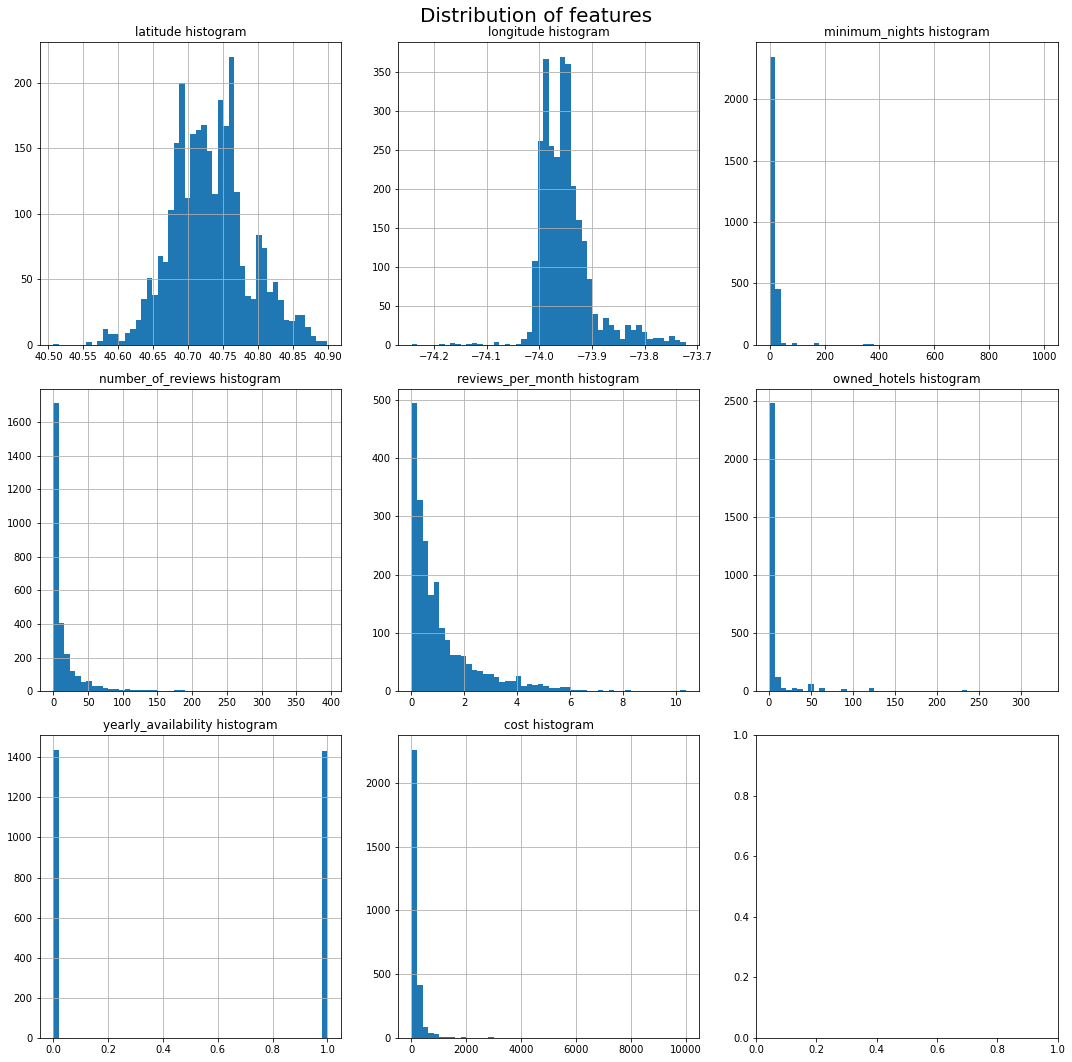

In [8]:
## Histograms of feature
def get_histogram(df,output):
    count=0
    for col in df.columns:
            count+=1
    if count%3==0:
        n_rows = count//3
    else:
        n_rows=(count//3)+1
    plt.subplots(n_rows,3,figsize=(15,15))
    i=0
    fig=[]
    for col in df.columns:
        if df[col].dtype != 'object':
            plt.subplot(n_rows,3,i+1)
            x=50
            df_new = df
            df_new[col].hist(bins=x)
            plt.title('{} histogram'.format(col))
            plt.suptitle('Distribution of features', fontsize=20)
            i+=1
        elif df[col].dtype == 'object':
#             col2=df[col].unique()
#             if(col=='month'):
#                 col2=sort_month(col2)
#             if(col=='day'):
#                 col2=sort_week(col2)
            plt.subplot(n_rows,3,i+1)
            df[col].value_counts().plot(kind='bar')
            plt.title('{} histogram'.format(col))
            i+=1
    plt.tight_layout()
    
display(get_histogram(df,'area'))

In [9]:
df.isna().sum()

latitude                 0
longitude                0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owned_hotels             0
yearly_availability      0
cost                     0
dtype: int64

In [10]:
df['reviews_per_month']=df['reviews_per_month'].fillna(0)
df.isna().sum()

latitude               0
longitude              0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
owned_hotels           0
yearly_availability    0
cost                   0
dtype: int64

None

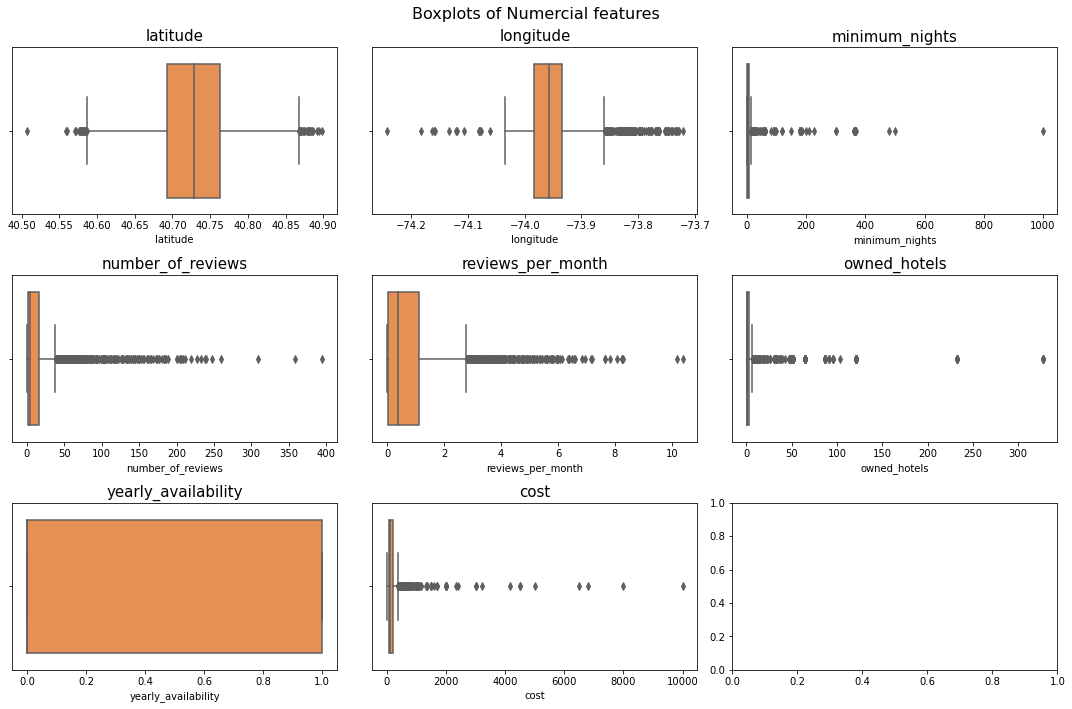

In [11]:
## Boxplots of numerical features
def boxplot_subplot(df):
    count=0
    for col in df.columns:
        if df[col].dtype!='object' and col!='Year':
            count+=1
        if count%3==0:
            n_rows = count//3
        else:
            n_rows=(count//3)+1
    plt.subplots(n_rows,3,figsize=(15,10))
    i=0
    fig=[]
    for col in df.columns:
        if df[col].dtype != 'object':
            fig.append(plt.subplot(n_rows,3,i+1))
            sns.boxplot(x=col,data=df,palette="Oranges_r",ax=fig[i]).set_title(col,fontsize=15)
            plt.suptitle('Boxplots of Numercial features', fontsize=16)
            plt.tight_layout()
            i+=1

display(boxplot_subplot(df))

<AxesSubplot:>

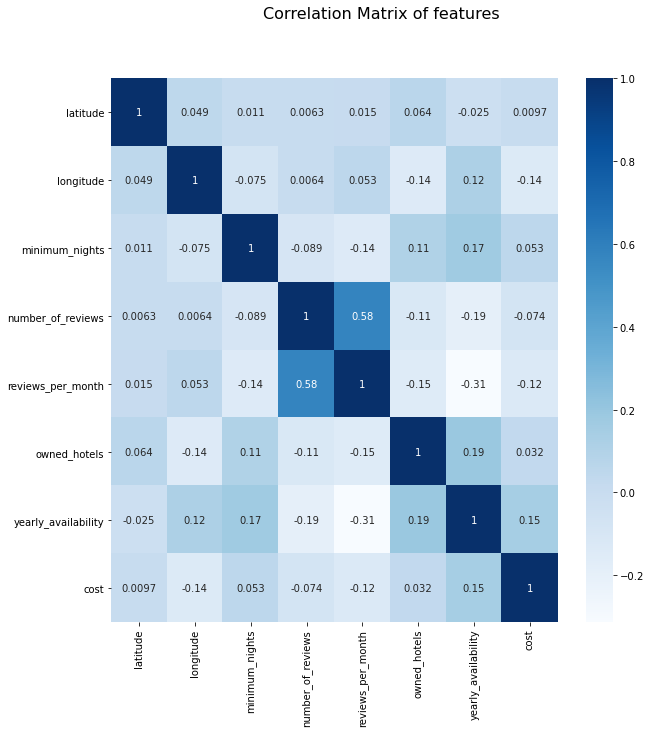

In [12]:
## Correlation matrix
plt.subplots(1,1,figsize=(10,10))
plt.subplot(1,1,1)
plt.suptitle('Correlation Matrix of features', fontsize=16)
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

#### There is no big correlation among the independent variables, so we don't have to drop any variables as of now

In [13]:
def LabelEncode(df):
    df=df.copy()
    from sorted_months_weekdays import Month_Sorted_Month as sort_month, Weekday_Sorted_Week as sort_week
    for col in df.columns:
        col_dict = {}
        if df[col].dtype=='object':
            col2=df[col].unique()
            if col=='month':
                col2=sort_month(col2)
            elif col=='week':
                col2=sort_week(col2)
            z=1
            for i in col2:
                col_dict[i]=z
                z+=1
            df[col]=df[col].map(col_dict)
#             print(col)
    return df

In [14]:
df_encode=LabelEncode(df)
df_encode

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability,cost
0,40.71854,-74.00439,5,7,0.56,1,0,170
1,40.64446,-73.95030,3,238,2.30,1,0,65
2,40.78573,-73.81062,1,0,0.00,1,1,85
3,40.73863,-73.98002,30,0,0.00,65,1,210
4,40.82426,-73.94630,3,38,0.42,3,1,75
...,...,...,...,...,...,...,...,...
2865,40.74316,-73.98038,2,0,0.00,1,1,400
2866,40.73523,-73.99465,3,2,0.07,1,1,180
2867,40.76619,-73.98987,3,17,0.67,1,0,179
2868,40.74637,-73.97207,30,0,0.00,49,1,200


In [15]:
df_input=df_encode.drop(columns=['cost'])
df_output=df_encode[['cost']]

In [16]:
scaler = StandardScaler()
scaler.fit(df_input)
df_scaled = pd.DataFrame(scaler.transform(df_input), columns=df_input.columns)
df_scaled

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability
0,-0.230897,-1.090408,-0.172006,-0.286837,-0.253349,-0.273479,-0.997216
1,-1.579468,-0.002863,-0.224685,6.826094,1.103612,-0.273479,-0.997216
2,0.992246,2.805573,-0.277364,-0.502380,-0.690073,-0.273479,1.002791
3,0.134826,-0.600420,0.486483,-0.502380,-0.690073,2.088075,1.002791
4,1.693655,0.077562,-0.224685,0.667712,-0.362530,-0.199680,1.002791
...,...,...,...,...,...,...,...
2865,0.217291,-0.607658,-0.251024,-0.502380,-0.690073,-0.273479,1.002791
2866,0.072932,-0.894574,-0.224685,-0.440796,-0.635482,-0.273479,1.002791
2867,0.636535,-0.798466,-0.224685,0.021082,-0.167565,-0.273479,-0.997216
2868,0.275727,-0.440575,0.486483,-0.502380,-0.690073,1.497687,1.002791


In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_output, train_size=0.7, shuffle=True, random_state=1)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-02-21 20:57:48] Features: 1/7 -- score: -161336.59133314854[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-02-21 20:57:48] Features: 2/7 -- score: -157376.7955079837[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2022-02-21 20:57:48] Features: 3/7 -- score: -156645.9504147969[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

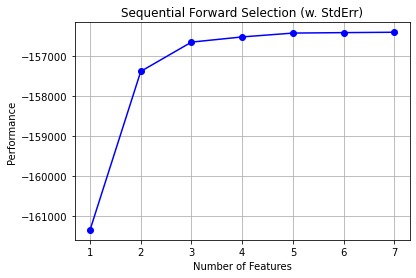

In [18]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

lreg = LinearRegression()



sfs1 = SFS(estimator=lreg, 
           k_features='best',
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=0)


sfs1 = sfs1.fit(df_scaled, df_output)
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [19]:
pd.DataFrame(sfs1.subsets_)

,1,2,3,4,5,6,7
feature_idx,"(6,)","(1, 6)","(1, 4, 6)","(1, 4, 5, 6)","(0, 1, 4, 5, 6)","(0, 1, 2, 4, 5, 6)","(0, 1, 2, 3, 4, 5, 6)"
cv_scores,[-161336.59133314854],[-157376.7955079837],[-156645.9504147969],[-156516.25425589824],[-156420.3509127793],[-156408.96968988734],[-156399.46399125908]
avg_score,-161337,-157377,-156646,-156516,-156420,-156409,-156399
feature_names,"(yearly_availability,)","(longitude, yearly_availability)","(longitude, reviews_per_month, yearly_availabi...","(longitude, reviews_per_month, owned_hotels, y...","(latitude, longitude, reviews_per_month, owned...","(latitude, longitude, minimum_nights, reviews_...","(latitude, longitude, minimum_nights, number_o..."


In [20]:
sfs1.k_feature_names_

('latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'owned_hotels',
 'yearly_availability')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-02-21 20:57:48] Features: 6/1 -- score: -156408.96968988734[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-02-21 20:57:48] Features: 5/1 -- score: -156420.3509127793[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2022-02-21 20:57:48] Features: 4/1 -- score: -156516.25425589824[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

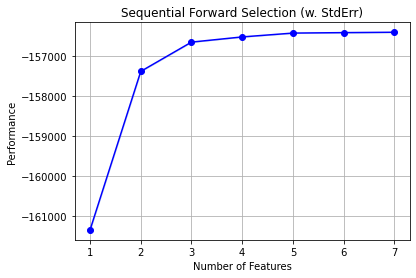

In [21]:
sfs2 = SFS(estimator=lreg, 
           k_features='best',
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=0)

sfs2 = sfs2.fit(df_scaled, df_output)
fig = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [22]:
pd.DataFrame(sfs2.subsets_)

,7,6,5,4,3,2,1
feature_idx,"(0, 1, 2, 3, 4, 5, 6)","(0, 1, 2, 4, 5, 6)","(0, 1, 4, 5, 6)","(1, 4, 5, 6)","(1, 4, 6)","(1, 6)","(6,)"
cv_scores,[-156399.46399125908],[-156408.96968988734],[-156420.3509127793],[-156516.25425589824],[-156645.9504147969],[-157376.7955079837],[-161336.59133314854]
avg_score,-156399,-156409,-156420,-156516,-156646,-157377,-161337
feature_names,"(latitude, longitude, minimum_nights, number_o...","(latitude, longitude, minimum_nights, reviews_...","(latitude, longitude, reviews_per_month, owned...","(longitude, reviews_per_month, owned_hotels, y...","(longitude, reviews_per_month, yearly_availabi...","(longitude, yearly_availability)","(yearly_availability,)"


In [23]:
sfs2.k_feature_names_

('latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'owned_hotels',
 'yearly_availability')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


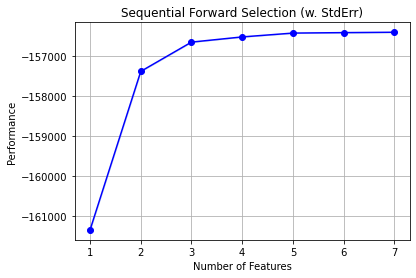

In [24]:
sffs = SFS(LinearRegression(),
         k_features='best',
         forward=True,
         floating=True,
         scoring='neg_mean_squared_error',
         cv=0)
sffs.fit(df_scaled, df_output)
fig = plot_sfs(sffs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()


In [25]:
sffs.k_feature_names_

('latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'owned_hotels',
 'yearly_availability')

In [26]:
pd.DataFrame(sffs.subsets_)

,1,2,3,4,5,6,7
feature_idx,"(6,)","(1, 6)","(1, 4, 6)","(1, 4, 5, 6)","(0, 1, 4, 5, 6)","(0, 1, 2, 4, 5, 6)","(0, 1, 2, 3, 4, 5, 6)"
cv_scores,[-161336.59133314854],[-157376.7955079837],[-156645.9504147969],[-156516.25425589824],[-156420.3509127793],[-156408.96968988734],[-156399.46399125908]
avg_score,-161337,-157377,-156646,-156516,-156420,-156409,-156399
feature_names,"(yearly_availability,)","(longitude, yearly_availability)","(longitude, reviews_per_month, yearly_availabi...","(longitude, reviews_per_month, owned_hotels, y...","(latitude, longitude, reviews_per_month, owned...","(latitude, longitude, minimum_nights, reviews_...","(latitude, longitude, minimum_nights, number_o..."


#### forward, backward and stepwise selection chooses all the variables with r2 and mean_suqared_error as scoring metric	


In [27]:
### Finding out the degree which works best for our data

# from sklearn.metrics import mean_squared_error

# rmses = []
# degrees = np.arange(2, 10)
# min_rmse, min_deg = 1e10, 0

# for deg in degrees:

#     # Train features
#     poly_reg = PolynomialFeatures(degree=deg, include_bias=False)
#     poly_features = poly_reg.fit_transform(df_scaled)
    
#     X_train, X_test, y_train, y_test= train_test_split(poly_features, df_output, 
#                                                    test_size=0.3,
#                                                    random_state=40)

#     poly_reg_model = LinearRegression()
#     poly_reg_model.fit(X_train, y_train)
    
#     poly_reg_y_predicted = poly_reg_model.predict(X_test)
    
#     poly_mse = mean_squared_error(y_test, poly_reg_y_predicted)
#     poly_rmse = np.sqrt(poly_mse)
#     rmses.append(poly_rmse)


In [28]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(degrees, rmses)
# ax.set_yscale('log')
# ax.set_xlabel('Degree')
# ax.set_ylabel('RMSE')

#### We will select degree 2 for polynomial regression as that works best for us data. Also it was asked in project description to use quadratic regression


In [31]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

n=df.shape[0]
k=X_train.shape[1]-1

# Linear Regression

print("************** R^2 of Models **************\n")
lreg = LinearRegression()
lreg.fit(X_train,y_train)
predict_y = lreg.predict(X_test)
r2=r2_score(y_test,predict_y)
print("Linear Regression: R^2 score is", r2)
print("Linear Regression: Adjusted R^2 score is", 1-((1-r2)*(n-1)/(n-k-1)))
print("\n")

#################### LassoCV ########################
# Lasso with 5 fold cross-validation
model_l_cv = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_l_cv.fit(X_train,y_train)
print(model_l_cv.alpha_)
lasso_best = Lasso(alpha=model_l_cv.alpha_)
lasso_best.fit(X_train, y_train)
prediction_lasso=lasso_best.predict(X_test)
r2=r2_score(y_test,prediction_lasso)
# lasso = Lasso(alpha=0.5)
# lasso.fit(X_train,y_train)
# prediction_lasso = lasso.predict(X_test)
# r2=r2_score(y_test,prediction_lasso)
print("Lasso Regression: R^2 score is", r2)
print("Lasso Regression: Adjusted R^2 score is", 1 - ((1-r2)*(n-1)/(n-k-1)))
print("\n")


##################### RidgeCV #####################
#define model
model_cv = RidgeCV(alphas=np.arange(.1, 1,0.01), cv=5, scoring='neg_mean_absolute_error')

#fit model
model_cv.fit(X_train,y_train)

#display lambda that produced the lowest test MSE
print("Best Alpha", model_cv.alpha_)

prediction_ridge=model_cv.predict(X_test)

r2=r2_score(y_test, prediction_ridge)
# ridge = Ridge(alpha=.5)
# ridge.fit(X_train,y_train)
# prediction_ridge = ridge.predict(X_test)
# r2=r2_score(y_test,prediction_ridge)
print("Ridge Regression: R^2 score is", r2)
print("Ridge Regression: Adjusted R^2 score is", 1 - ((1-r2)*(n-1)/(n-k-1)))
print("\n")


poly_reg = PolynomialFeatures(degree=2)
poly_features = poly_reg.fit_transform(X_train)

poly_reg.fit(poly_features, y_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)
poly_reg_y_predicted = poly_reg_model.predict(poly_reg.fit_transform(X_test))
r2=r2_score(y_test,poly_reg_y_predicted)
print("Quadratic Regression: R^2 score is", r2)
print("Quadratic Regression: Adjusted R^2 score is", 1 - ((1-r2)*(n-1)/(n-k-1)))
print("\n")


print()
est_gp = SymbolicRegressor()
est_gp.fit(X_train,y_train)
y_gp = est_gp.predict(X_test)
predict_y_gp = est_gp.predict(X_test)
r2=r2_score(y_test,predict_y_gp)
print("Symbolic Regression: R^2 score is", r2)
print("Symbolic Regression: Adjusted R^2 score is", 1 - ((1-r2)*(n-1)/(n-k-1)))
print("\n")

************** R^2 of Models **************

Linear Regression: R^2 score is 0.0414320624453266
Linear Regression: Adjusted R^2 score is 0.03942318796913802


2.7304476164675275
Lasso Regression: R^2 score is 0.040555507468974406
Lasso Regression: Adjusted R^2 score is 0.03854479599318461




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best Alpha 0.9899999999999995
Ridge Regression: R^2 score is 0.04142602451455524
Ridge Regression: Adjusted R^2 score is 0.03941713738465202


Quadratic Regression: R^2 score is 0.05442672668346937
Quadratic Regression: Adjusted R^2 score is 0.052445085174597894





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Symbolic Regression: R^2 score is -0.024828426607538034
Symbolic Regression: Adjusted R^2 score is -0.026976163442901324




In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=10, shuffle=True)
# create model
lreg = LinearRegression()
lasso = Lasso(alpha=2.7304476164675275)
ridge = Ridge(alpha=0.9899999999999995)
est_gp = SymbolicRegressor()
poly=LinearRegression()

models={lreg:"Linear Regression", lasso:"Lasso Regression", ridge:"Ridge Regression", poly:"Quadratic Regression",est_gp:"Symbolic Regression"}

print("************** R^2-cross-validated of Models **************\n")
for key in models:
    if key=='poly':
        poly_features = PolynomialFeatures(degree=2)
        X_poly = poly_features.fit_transform(df_scaled)
        poly_cv=cross_val_score(poly, X_poly, df_output, scoring='r2',cv=5)
        print(models[key]+' R^2 score is: %.3f (%.3f)' % (np.mean(poly_cv), np.std(scores))+"\n")
    else:
        # evaluate model
        scores = cross_val_score(key, df_scaled, df_output, scoring='r2', cv=cv, n_jobs=-1)
        # report performance
        print(models[key]+' R^2 score is: %.3f (%.3f)' % (np.mean(scores), np.std(scores))+"\n")
    

    

************** R^2-cross-validated of Models **************

Linear Regression R^2 score is: 0.033 (0.044)

Lasso Regression R^2 score is: 0.038 (0.038)

Ridge Regression R^2 score is: 0.033 (0.044)

Quadratic Regression R^2 score is: 0.033 (0.044)

Symbolic Regression R^2 score is: -0.099 (0.169)

